In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from numpy.polynomial.polynomial import polyfit

cols=['Date', 'Time', 'Open','High','Low','Last']
dfm = pd.read_csv('data/eum.csv',skipinitialspace=True, usecols=cols)
dfw = pd.read_csv('data/euw.csv',skipinitialspace=True, usecols=cols)
dfd = pd.read_csv('data/eud.csv',skipinitialspace=True, usecols=cols)
df4hr = pd.read_csv('data/eu4h.csv',skipinitialspace=True, usecols=cols)
# df1hr = pd.read_csv('data/HSI.1hr.csv',skipinitialspace=True, usecols=cols)


## Cleanup data and reduce the size of datasets

In [3]:
#reset index
def cleanup2(df):    
    df = df.tail(96)
    df.reset_index(inplace=True)        
    return df

dfm = dfm.tail(24)
dfm.reset_index(inplace=True) 

dfw = dfw.tail(12)
dfw.reset_index(inplace=True) 

dfd = dfd.tail(30)
dfd.reset_index(inplace=True) 

df4hr = cleanup2(df4hr)
df4hr = df4hr.tail(30)
df4hr.reset_index(inplace=True) 

# print(df4hr)
# df4hr.dtypes
##Add another column combining data and time for plotting later
df4hr['Datetime_col'] = df4hr['Date'] + df4hr['Time']

## Stats

In [4]:
stats = pd.DataFrame(columns=['count','mean','std','min','25%','50%','75%','max','timeframe'])


lstm = dfm['Last']
lstw = dfw['Last']
lstd = dfd['Last']
lst4hr = df4hr['Last']


a = lstm.describe()
b = lstw.describe()
c = lstd.describe()
d = lst4hr.describe()

a_series = pd.Series(a, index = stats.columns)
a_series['timeframe'] = 'm'
stats = stats.append(a_series, ignore_index=True)

b_series = pd.Series(b, index = stats.columns)
b_series['timeframe'] = 'w'
stats = stats.append(b_series, ignore_index=True)

c_series = pd.Series(c, index = stats.columns)
c_series['timeframe'] = 'd'
stats = stats.append(c_series, ignore_index=True)

d_series = pd.Series(d, index = stats.columns)
d_series['timeframe'] = '4hr'
stats = stats.append(d_series, ignore_index=True)


#print(stats)
#print(a_series)
# print(len(lst))
# #print(a.describe())
# #print(a.values)
# print(lst)
#print(stats)

## Graph Plotting

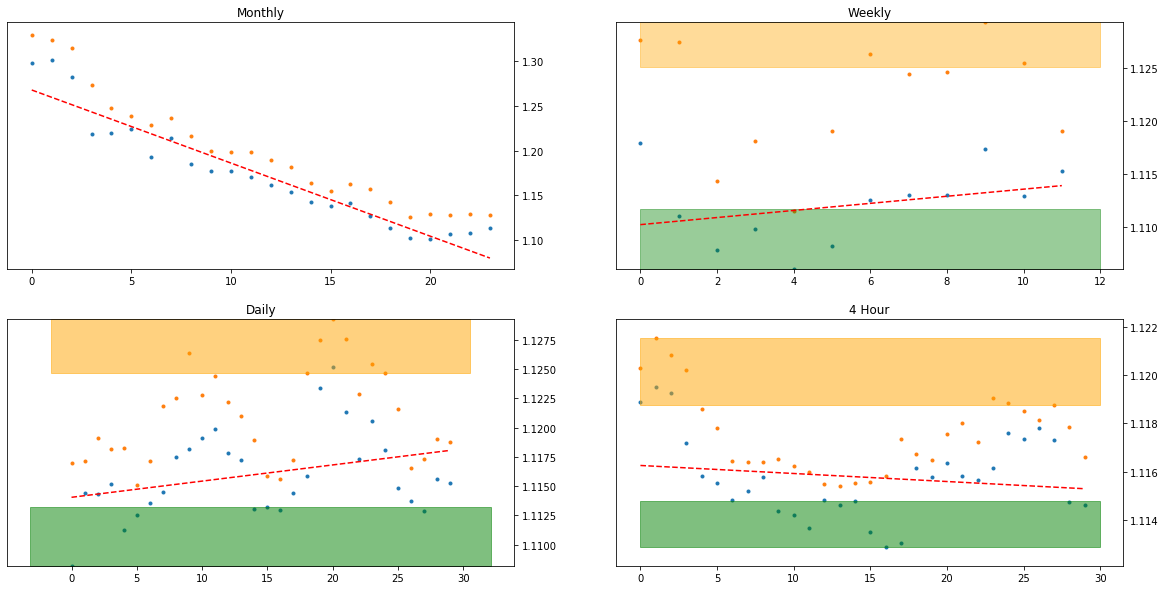

In [12]:
#Set the thing we are plotting
thething = 'Low'
anotherthing = 'High'

# fig, axs = plt.subplots(figsize=(15,7))
# axs.scatter(dfm.Date, dfm.Last)
##############------MONTHLY------###########
fig, axs = plt.subplots(2, 2, figsize=(20,10))
axs[0, 0].scatter(dfm.index, dfm[thething], marker=".")
axs[0, 0].scatter(dfm.index, dfm[anotherthing], marker=".")
axs[0, 0].set_title('Monthly')
axs[0, 0].yaxis.tick_right()
# Fit with polyfit
b, m = polyfit(dfm.index, dfm[thething], 1)
axs[0, 0].plot(dfm.index, b + m * dfm.index, 'r--')

##############------WEEKLY------###########
axs[0, 1].scatter(dfw.index, dfw[thething], marker='.')
axs[0, 1].scatter(dfw.index, dfw[anotherthing], marker='.')
axs[0, 1].set_ylim([dfw[thething].min(), dfw[anotherthing].max()])
axs[0, 1].set_title('Weekly')
axs[0, 1].yaxis.tick_right()
# Fit with polyfit
b, m = polyfit(dfw.index, dfw[thething], 1)
axs[0, 1].plot(dfw.index, b + m * dfw.index, 'r--')


##############------DAILY------###########
axs[1, 0].scatter(dfd.index, dfd[thething], marker='.')
axs[1, 0].scatter(dfd.index, dfd[anotherthing], marker='.')
axs[1, 0].set_ylim([dfd[thething].min(), dfd[anotherthing].max()])
axs[1, 0].set_title('Daily')
axs[1, 0].yaxis.tick_right()
# Fit with polyfit
b, m = polyfit(dfd.index, dfd[thething], 1)
axs[1, 0].plot(dfd.index, b + m * dfd.index, 'r--')


##############------4HR------###########
btm_Buffer = df4hr[thething].quantile(0.1) - df4hr[thething].min()
axs[1, 1].scatter(df4hr.index, df4hr[thething], marker='.')
axs[1, 1].scatter(df4hr.index, df4hr[anotherthing], marker='.')
axs[1, 1].set_ylim([df4hr[thething].min() - btm_Buffer, df4hr[anotherthing].max() + btm_Buffer])
axs[1, 1].yaxis.tick_right()
# Fit with polyfit
b, m = polyfit(df4hr.index, df4hr[thething], 1)
axs[1, 1].plot(df4hr.index, b + m * df4hr.index, 'r--')
axs[1, 1].set_title('4 Hour')

#axs[1, 0].axhline(y=dfd['High'].quantile(0.5),c="red",linewidth=1.5)
#axs[1, 0].axhline(y=dfd['High'].max(),c="black",linewidth=1.5)
#axs[1, 0].axhline(y=dfd['High'].quantile(0.8),c="black",linewidth=1.5)
axs[0, 1].fill_between([0,12],dfw['High'].quantile(0.6), dfw['High'].max(),alpha=0.4,color='orange')
axs[0, 1].fill_between([0,12],dfw['Low'].quantile(0.4), dfw['Low'].min(),alpha=0.4,color='green')

axs[1, 0].fill_between(axs[1, 0].get_xlim(),dfd['High'].quantile(0.8), dfd['High'].max(),alpha=0.5,color='orange')
axs[1, 0].fill_between(axs[1, 0].get_xlim(),dfd['Low'].quantile(0.2), dfd['Low'].min(),alpha=0.5,color='green')

axs[1, 1].fill_between([0,df4hr['index'].count()],df4hr[anotherthing].quantile(0.8), df4hr[anotherthing].max(),alpha=0.5,color='orange')
axs[1, 1].fill_between([0,df4hr['index'].count()],df4hr[thething].quantile(0.3), df4hr[thething].min(),alpha=0.5,color='green')


In [6]:
print('Highest High = ', dfd['High'].max())
print('Lowest Low = ', dfd['Low'].min())

Highest High =  1.1293
Lowest Low =  1.1082


In [7]:
df4hr['index'].count()

30

In [8]:
df4hr['Low'].quantile(0.3) - df4hr['Low'].min()

0.0018849999999999145

In [9]:
df4hr.describe(include='all')

,level_0,index,Date,Time,Open,High,Low,Last,Datetime_col
count,30.000000,30.000000,30,30,30.000000,30.000000,30.000000,30.000000,30
unique,NaN,NaN,7,6,NaN,NaN,NaN,NaN,30
top,NaN,NaN,2020/1/8,14:00:00,NaN,NaN,NaN,NaN,2020/1/1310:00:00
freq,NaN,NaN,6,5,NaN,NaN,NaN,NaN,1
mean,80.500000,599.500000,NaN,NaN,1.116688,1.117547,1.115785,1.116625,NaN
std,8.803408,8.803408,NaN,NaN,0.001687,0.001669,0.001730,0.001650,NaN
min,66.000000,585.000000,NaN,NaN,1.114050,1.115400,1.112900,1.114050,NaN
25%,73.250000,592.250000,NaN,NaN,1.115325,1.116400,1.114675,1.115275,NaN
50%,80.500000,599.500000,NaN,NaN,1.116375,1.117300,1.115725,1.116400,NaN
75%,87.750000,606.750000,NaN,NaN,1.117900,1.118575,1.116988,1.117637,NaN


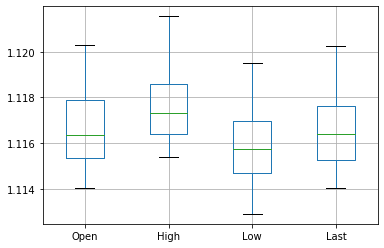

In [10]:
boxplot = df4hr.boxplot(column=['Open', 'High','Low','Last'])